In [8]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt

from astropy.timeseries import LombScargle

def amplitude_spectrum(t, y, fmin=None, fmax=None, oversample_factor=10.0):
    
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp

In [78]:
lc = lk.search_lightcurve('HD 28548', mission='TESS', exptime=120, sector=5).download().remove_nans()
lc = lc.normalize()

In [79]:
x, y = lc.time.value, lc.flux.value

In [80]:
f, a = amplitude_spectrum(x, y, fmin=30.24, fmax=75.6)

In [81]:
dnu = 7.56

In [82]:
for i in range(1,12):
    print(i * dnu, dnu*i + (dnu))

7.56 15.12
15.12 22.68
22.68 30.24
30.24 37.8
37.8 45.36
45.36 52.92
52.919999999999995 60.48
60.48 68.03999999999999
68.03999999999999 75.6
75.6 83.16
83.16 90.72


In [83]:
plt.style.use('science')

/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))
<ipython-input-107-c09df48ce72f>:46: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.subplots_adjust(wspace=0.05, hspace=0.25)


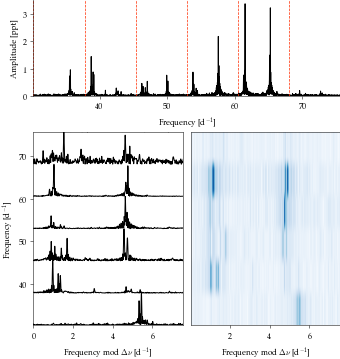

In [107]:
axes = plt.figure(constrained_layout=True, figsize=[5.5, 6]).subplot_mosaic(
    """
    aa
    bc
    """,
    gridspec_kw={
        # set the height ratios between the rows
        "height_ratios": [0.5, 1],
        # set the width ratios between the columns
#         "width_ratios": [1, 3.5, 1],
    },
)
fmin=30.24
fmax=75.6

ax = axes['a']
f, a = amplitude_spectrum(x, y, fmin=fmin, fmax=fmax)
axes['a'].plot(f,a * 1e3, c='k', rasterized=True)
for i in range(12):
    axes['a'].axvline(i * dnu, c='C3', lw=0.7, linestyle='dashed')

ax.set_xlim(fmin, fmax)
ax.set_ylim(0, None)
ax.set_xlabel(r'Frequency [d$^{-1}$]')
ax.set_ylabel('Amplitude [ppt]')
              
ax = axes['c']
plot_echelle(f, a, 7.56, fmin=fmin, fmax=fmax, scale='sqrt', ax=ax, cmap='Blues', sampling=10)
ax.set_xlabel(r'Frequency mod $\Delta\nu$ [d$^{-1}$]')
ax.set_yticks([])
ax.set_ylabel('')

ax = axes['b']
for i in range(12):
    f, a = amplitude_spectrum(x, y, fmin=dnu*i, fmax=dnu*i + dnu)
    f = f % dnu
    sort = np.argsort(f)
    a /= a.max()
    a *= dnu
    ax.plot(f[sort], (a + i*dnu)[sort], c='k', rasterized=True)
ax.set_xlim(0, dnu)
ax.set_ylim(fmin, fmax)
ax.set_xlabel(r'Frequency mod $\Delta\nu$ [d$^{-1}$]')
ax.set_ylabel(r'Frequency [d$^{-1}$]')

plt.subplots_adjust(wspace=0.05, hspace=0.25)

# plt.savefig('echelle.pdf', dpi=300, bbox_inches='tight')

/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:93: RuntimeWarning: invalid value encountered in true_divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


(30.24, 75.6)

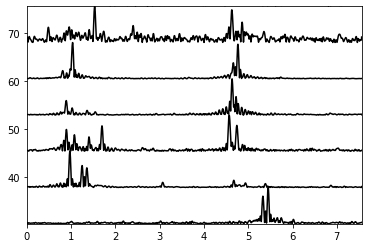

In [60]:
for i in range(12):
    f, a = amplitude_spectrum(x, y, fmin=dnu*i, fmax=dnu*i + dnu)
    f = f % dnu
    sort = np.argsort(f)
    a /= a.max()
    a *= dnu
    plt.plot(f[sort], (a + i*dnu)[sort], c='k')
plt.xlim(0, dnu)
plt.ylim(30.24, 75.6)

In [24]:
from echelle import plot_echelle

<AxesSubplot:xlabel='Frequency mod 7.56', ylabel='Frequency'>

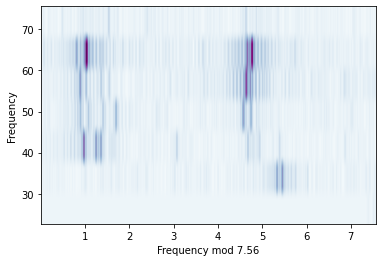

In [27]:
plot_echelle(f, a, 7.56, fmin=30, scale='sqrt')